### matplotlib chart

```python
1. histogram : 연속형값의 도수(빈도수/개수) 파악
2. bar plot : 범주형값의 개수, 또는 다른 연속값을 파악
3. scatter plot : 산포도(산점도) 두 연속값들의 분포 파악
4. line plot : 시계열데이터(연속값) 변화 파악
5. box plot : 연속형 값의 사분위, 이상치 파악
6. pie chart : 전체 범위 중의 비율
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##### 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

In [ ]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name() # 한글 폰트 이름 가져오기
matplotlib.rc('font', family=font) # 한글 폰트 사용 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 사용 설정

#### Histogram
- 연속형 값을 일정 구간을 나누어 구간별 데이터 포인트의 빈도를 시각화
    - x축: 연속형 데이터
    - y축: 구간별 데이터포인트의 개수 (합)

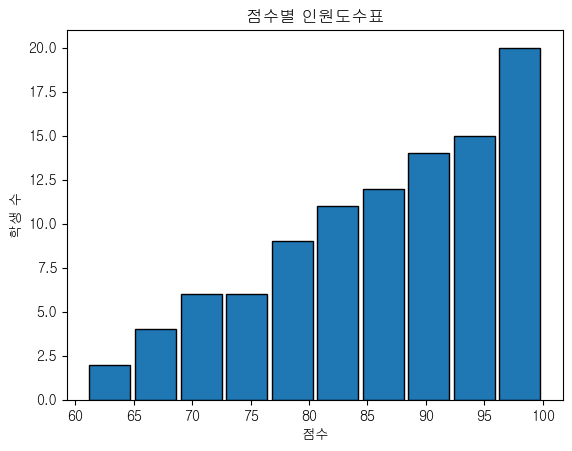

In [15]:
scores = [100, 95, 97, 98, 99, 90, 80, 81, 84, 88, 70, 78, 79, 70, 65, 66, 61, 64, 100, 89]

bins = [60, 70, 80, 90, 100]
plt.hist(scores, edgecolor='black', rwidth=.9, cumulative=True)
# cumulative : 누적 빈도수 표시 (기본값=False)

# 라벨 설정
plt.xlabel('점수')
plt.ylabel('학생 수')
plt.title('점수별 인원도수표')
plt.show()

In [16]:
# 암호화폐 일일수익률 데이터

df = pd.read_csv('./data/crypto_daily_returns.csv')
df

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
...,...,...,...,...
2380,3/28/2021,-0.040672,-1.464535,0.107149
2381,3/29/2021,3.216138,7.587343,5.105316
2382,3/30/2021,2.021625,1.447984,1.135017
2383,3/31/2021,0.001936,3.918042,0.415392


In [19]:
df.info()
# df.describe()
# df.isnull().sum()
# df.isnull().sum().sum()
# df.isnull().sum().sum()/len(df)
# df.isnull().sum().sum()/len(df)
# df.isnull().sum().sum()/len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2385 non-null   object 
 1   BTC     2385 non-null   float64
 2   ETH     2061 non-null   float64
 3   LTC     2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


In [22]:
df.describe()

,BTC,ETH,LTC
count,2385.000000,2061.000000,2385.000000
mean,0.280359,0.538739,0.315764
std,3.887338,6.471972,5.783455
min,-37.169539,-72.824950,-40.224814
25%,-1.209796,-2.257161,-1.922825
50%,0.203326,0.043409,-0.022066
75%,1.804233,2.912284,2.078286
max,25.247169,50.732307,66.765321


In [20]:
df.isnull().sum()

Date      0
BTC       0
ETH     324
LTC       0
dtype: int64

In [21]:
df.isnull()

np.int64(324)

In [ ]:
# 누락값 처리
df = df.dropna()
df.info()
# 데이터 타입 변환
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df.describe()

In [ ]:
# 데이터 정제
df = df.drop_duplicates()

In [ ]:
df.info()

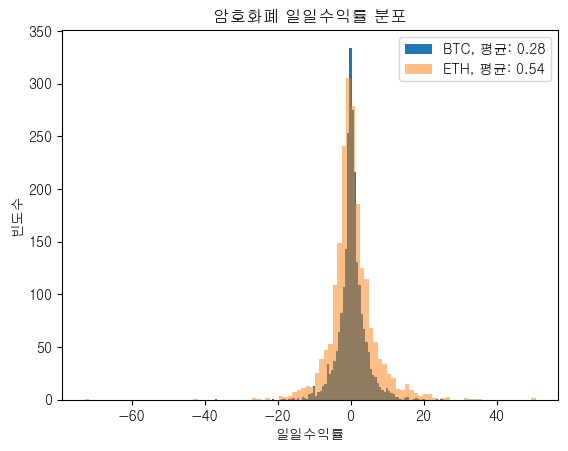

In [30]:
plt.hist(df['BTC'],
         bins=100,
         label='BTC, 평균: {:.2f}'.format(df['BTC'].mean())
         )
plt.hist(df['ETH'],
         bins=100,
         alpha=0.5, label='ETH, 평균: {:.2f}'.format(df['ETH'].mean()))

plt.legend()


plt.title('암호화폐 일일수익률 분포')
plt.xlabel('일일수익률')
plt.ylabel('빈도수')

plt.show()

##### bar plot
- 범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화
    - x축 : 범주형 데이터 카테고리
    - y축 : 연속형 데이터 (총합, 평균)

In [31]:
# 월별 매출 데이터
df = pd.DataFrame({
    'months': ['1월', '2월', '3월', '4월', '5월', '6월'],
    'sales': [1300, 1600, 1700, 1650, 1900, 2300]
})

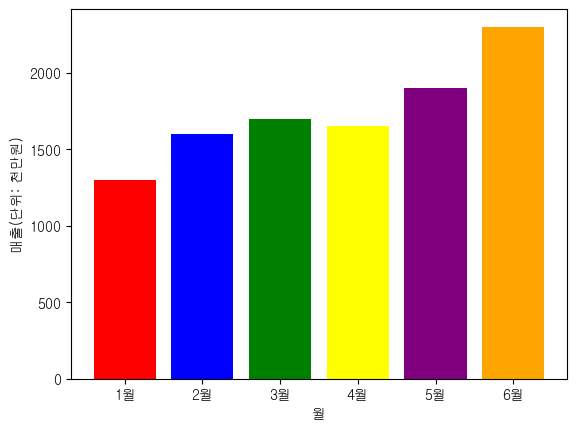

In [39]:
plt.bar(df['months'], df['sales'],
        color=['red', 'blue', 'green', 'yellow', 'purple', 'orange']
        
        )

plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')

plt.show()

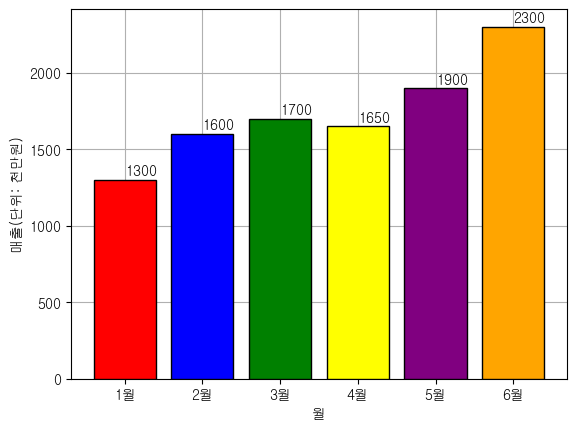

In [62]:
plt.bar(df['months'], df['sales'],
        color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'],
        alpha=1,
        # 막대 값 선으로 연결하는 코드는 아래와 같이 표현한다.
        


        edgecolor='black',
        # 막대 둥근 정도
        linewidth=1,
        zorder=10
        )

for i, val in enumerate(df['sales']):
    plt.text(i, val + 100, str(val), ha='left', va='top')

# x축 위치, y축 위치, 텍스트, 텍스트 정렬(위치)
# zorder : 그래프 순서 지정, 높을수록 위에 표시, z축 깊이 설정정

plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')
plt.grid(zorder=0)
plt.show()

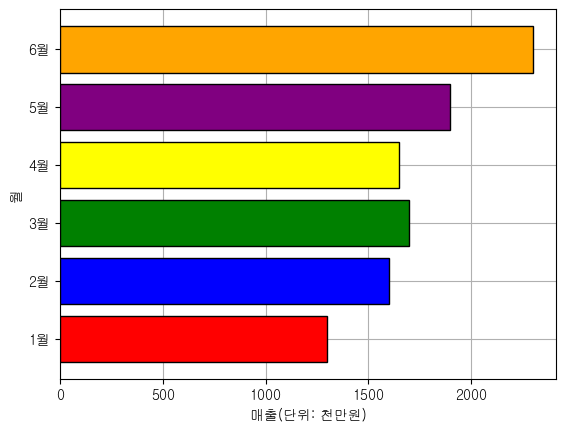

In [70]:
# 수평 막대그래프
# - x축: 연속형
# - y축: 범주형

plt.barh(df['months'], df['sales'],
        color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'],
        alpha=1,
        edgecolor='black',
        linewidth=1,
        zorder=10
        )

plt.xlabel('매출(단위: 천만원)')
plt.ylabel('월')

# for i, val in enumerate(df['sales']):
#     plt.text(i, val, str(val))

plt.grid(zorder=0)
plt.show()

In [71]:
# 나라별 맥주 시각화각화
beers_df = pd.read_csv('./data/beers.csv')
beers_df

,beer_name,beer_type,country
0,Heineken,Pale Lager,Netherlands
1,Guinness,Stout,Ireland
2,Corona Extra,Pale Lager,Mexico
3,Stella Artois,Pilsner,Belgium
4,Budweiser,Pale Lager,USA
5,Hoegaarden,Witbier,Belgium
6,Carlsberg,Pale Lager,Denmark
7,Sapporo,Lager,Japan
8,Asahi,Lager,Japan
9,Becks,Pilsner,Germany


In [72]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   beer_name  12 non-null     object
 1   beer_type  12 non-null     object
 2   country    12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes


In [73]:
beers_df.describe()

,beer_name,beer_type,country
count,12,12,12
unique,12,7,8
top,Heineken,Pale Lager,Belgium
freq,1,4,4


In [74]:
beers_df.isnull().sum()

beer_name    0
beer_type    0
country      0
dtype: int64

In [75]:
beers_df.isnull().sum().sum()
beers_df.isnull().sum().sum()/len(beers_df)

np.float64(0.0)

In [76]:
beers_df.groupby('country').value_counts()

country      beer_name      beer_type         
Belgium      Duvel          Belgian Strong Ale    1
             Hoegaarden     Witbier               1
             Leffe          Blonde Ale            1
             Stella Artois  Pilsner               1
Denmark      Carlsberg      Pale Lager            1
Germany      Becks          Pilsner               1
Ireland      Guinness       Stout                 1
Japan        Asahi          Lager                 1
             Sapporo        Lager                 1
Mexico       Corona Extra   Pale Lager            1
Netherlands  Heineken       Pale Lager            1
USA          Budweiser      Pale Lager            1
Name: count, dtype: int64

In [78]:
beers_df.groupby('country')['beer_name'].count()

country
Belgium        4
Denmark        1
Germany        1
Ireland        1
Japan          2
Mexico         1
Netherlands    1
USA            1
Name: beer_name, dtype: int64

In [80]:
beer_df_groupby = beers_df.groupby('country')['beer_name'].count()

country
Belgium        4
Denmark        1
Germany        1
Ireland        1
Japan          2
Mexico         1
Netherlands    1
USA            1
Name: beer_name, dtype: int64

In [92]:
beers_df['beer_name'].nunique()

12

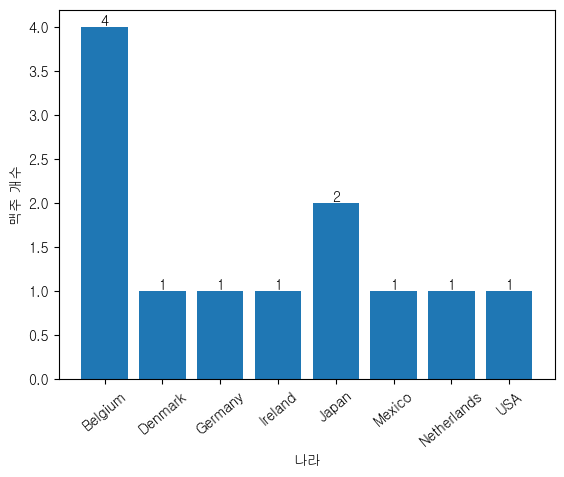

In [97]:
# 바 그래프 시각화 beer_df_groupby

plt.bar(beer_df_groupby.index, beer_df_groupby.values
)

plt.xlabel('나라')
plt.ylabel('맥주 개수')
plt.xticks(rotation=40)
# for i, val in enumerate(beers_df['beer_name']):
#     plt.text(i, val, str(val))
# 막대 위에 각 나라별 맥주 개수를 표시하려면, enumerate(beer_df_groupby)로 인덱스와 값을 받아서 plt.text로 표시해야 합니다.
# beers_df['beer_name']은 전체 맥주 이름의 리스트이기 때문에, 막대 개수(나라 수)와 맞지 않아 에러가 발생합니다.
# 아래처럼 수정하면 됩니다.


for i, val in enumerate(beer_df_groupby.values):
    plt.text(i, val, str(val), ha='center', va='bottom')
# 내가 원하는 것은 Japan 막대 그래프 위에는 Sapporo, Asahi 를 표기하고 싶은 것이다.

plt.show()

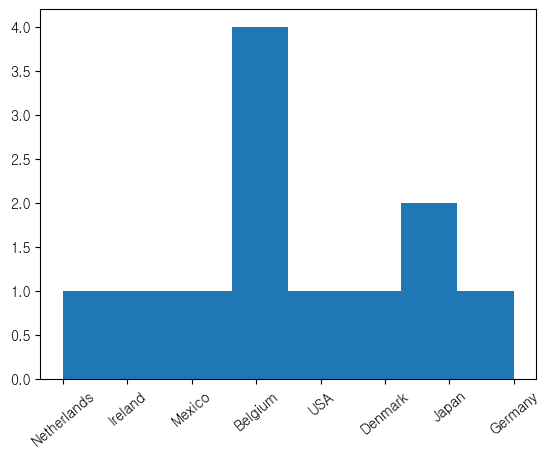

In [88]:
# 바 그래프 시각화 beer_df_groupby

plt.hist(beers_df['country'], bins=beers_df['country'].nunique()
)

plt.xticks(rotation=40)

plt.show()

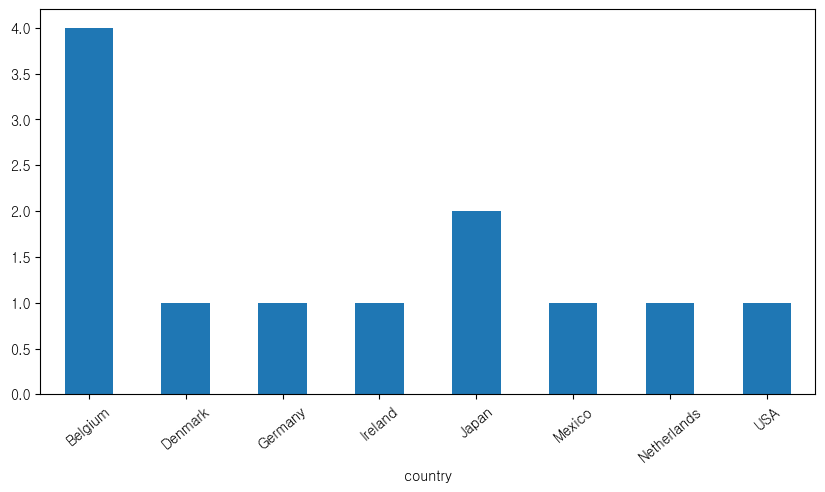

In [93]:
# Series/ DataFrame 기준으로 plot
beer_df_groupby.plot(kind='bar', figsize=(10, 5)
)

plt.xticks(rotation=40)
plt.show()

##### Line plot
- 시계열 데이터에서 변화하는 값의 추이를 시각화
    - x축: 연속형 데이터
    - y축: 연속형 데이터

In [95]:
# 주가 추이
df = pd.DataFrame({
    'Date' : pd.date_range(start='2025-01-01', periods=14, freq='D'),
    'APPL': np.random.randint(100, 150, 14),
    'MSFT': np.random.randint(100, 150, 14)
})
df

,Date,APPL,MSFT
0,2025-01-01,134,136
1,2025-01-02,102,130
2,2025-01-03,126,140
3,2025-01-04,146,116
4,2025-01-05,139,138
5,2025-01-06,108,100
6,2025-01-07,136,149
7,2025-01-08,128,138
8,2025-01-09,100,149
9,2025-01-10,126,105


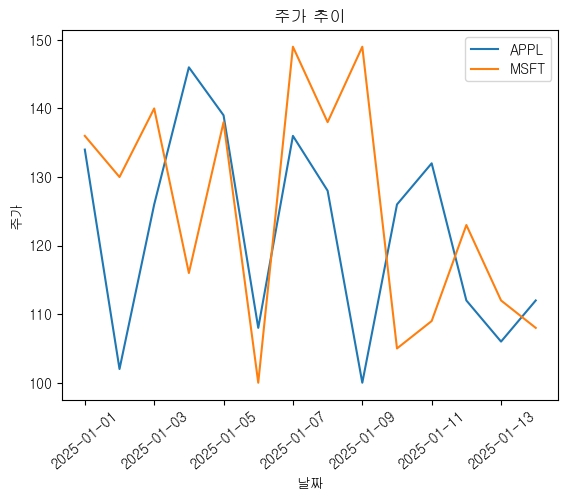

In [101]:
plt.plot(df['Date'], df['APPL'], label='APPL')
plt.plot(df['Date'], df['MSFT'], label='MSFT')

plt.xticks(rotation=40)
plt.xlabel('날짜')
plt.ylabel('주가')
plt.title('주가 추이')

plt.legend()
plt.show()


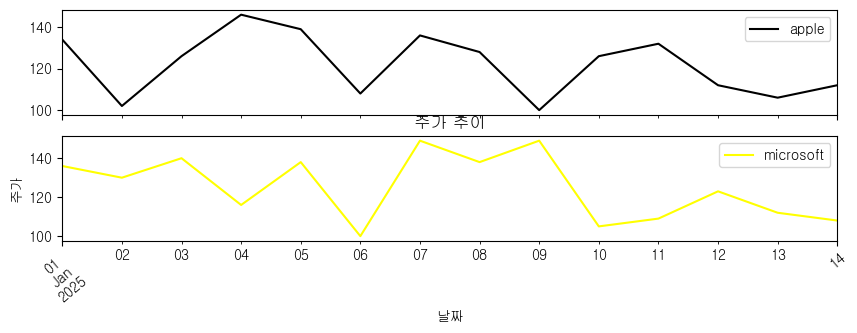

In [ ]:
df.plot(
    x='Date',
    y=['APPL', 'MSFT'],
    color=['black', 'yellow'],
    label=['apple', 'microsoft'], # legend 설정하지 않아도 만들어짐
    subplots=True,                # 서브플롯 생성
    kind='line', # 선 그래프, 기본값값
    figsize=(10, 3)
)

plt.title('주가 추이')

plt.xlabel('날짜')
plt.ylabel('주가')
plt.xticks(rotation=40)

plt.legend()
plt.show()


In [116]:
# 코인 주가 추이
crypto_df = pd.read_csv('./data/crypto_daily_prices.csv')

In [117]:
crypto_df

,Date,BTC-USD Price,ETH-USD Price,LTC-USD Price
0,9/17/2014,457.334015,NaN,5.058550
1,9/18/2014,424.440002,NaN,4.685230
2,9/19/2014,394.795990,NaN,4.327770
3,9/20/2014,408.903992,NaN,4.286440
4,9/21/2014,398.821014,NaN,4.245920
...,...,...,...,...
2380,3/28/2021,55950.746090,1691.355957,185.028488
2381,3/29/2021,57750.199220,1819.684937,194.474777
2382,3/30/2021,58917.691410,1846.033691,196.682098
2383,3/31/2021,58918.832030,1918.362061,197.499100


In [118]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2385 non-null   object 
 1   BTC-USD Price  2385 non-null   float64
 2   ETH-USD Price  2061 non-null   float64
 3   LTC-USD Price  2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


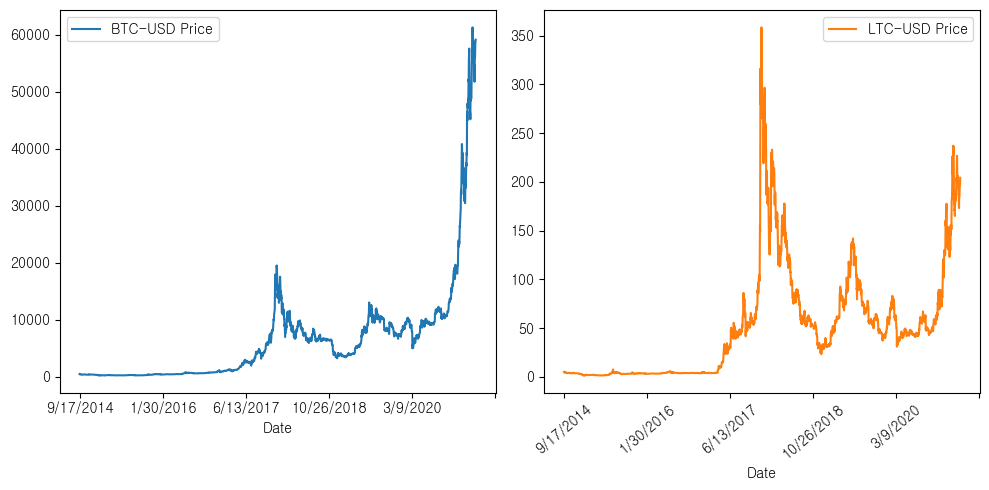

In [127]:
crypto_df.plot(
    x='Date',
    y=['BTC-USD Price', 'LTC-USD Price'],
    subplots=True,
    layout=(1, 2),
    kind='line',
    figsize=(10, 5)
)

plt.xticks(rotation=40) # 날짜 회전, subplots 그래프 모두 표시하기 위해서는 모든 그래프에 적용해야 함
plt.tight_layout() # 서브플롯 간격 조정
plt.show()

#### scatter

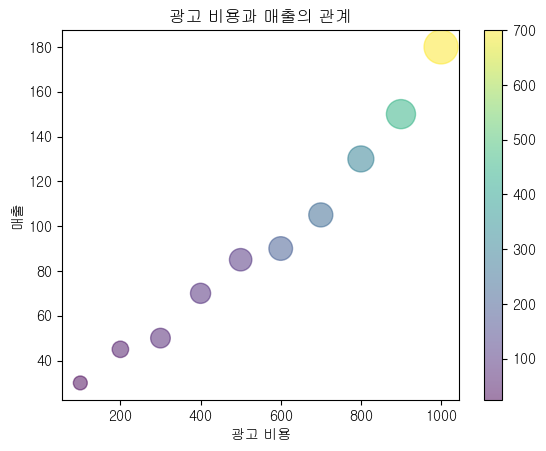

In [ ]:
df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})

# s: 점의 크기, c: 점의 색상, alpha: 점의 투명도
# x축, y축, s = 점의 크기, c = 점의 색상(컬러 값으로 연속 데이터 표현)
plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c=df['colors'], alpha=0.5)

plt.colorbar()

plt.xlabel('광고 비용')
plt.ylabel('매출')
plt.title('광고 비용과 매출의 관계')
plt.show()




##### Pie Chart

- 전체에서 각 부분이 기여하는 비율을 시각화

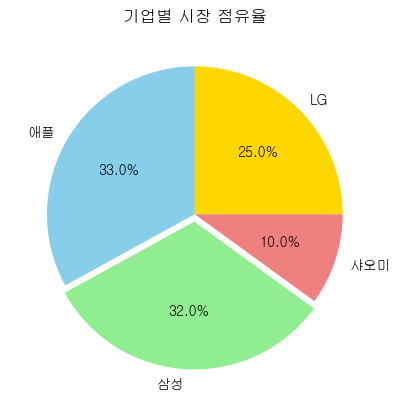

In [ ]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    'explode': [0, 0.05, 0, 0]
})

plt.pie(
    # 각 조각의 비율
    df['market_share'],
    # labels: 각 조각에 라벨 표시, 라벨 없으면 빈 문자열로 표시
    labels=df['label'],
    # autopct: 각 조각에 비율 표시, %.1f%% 형식으로 표시
    autopct='%.1f%%',
    # 시작 각도, 기본은 3시방향인데 90도 회전하면 12시방향으로 시작, 0인덱스 부터 반시계 방향순
    startangle=90, 
    # explode: 각 조각을 분리하는 정도, 0이면 분리 없음, 0.1이면 조각 분리
    explode=df['explode'],
    # colors: 각 조각의 색상, 기본값은 색상 순서대로 적용
    colors=['skyblue', 'lightgreen', 'lightcoral', 'gold']
)

plt.title('기업별 시장 점유율')
plt.show()

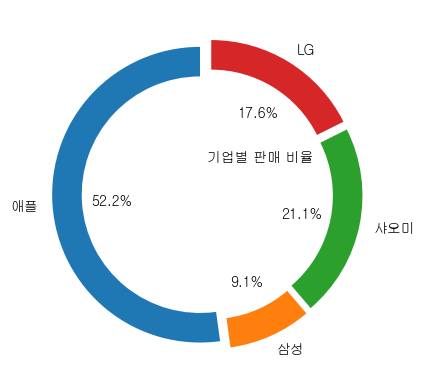

In [159]:
plt.pie(
    df['sales'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode=[.05, .05, .05, .05],
    # wedgeprops: 조각의 둥근 정도
    wedgeprops={'width': .2}
)
# 텍스트 표시(0, 0, 텍스트, 텍스트 정렬(위치)) -> 0, 0 은 중심 좌표
plt.text(0, .25, '기업별 판매 비율', ha='left', va='center')

plt.show()

##### Box plot
- 연속형 데이터의 분포를 사분위수로 시각화
- 이상치 outlier를 도출하는 데에 효과적
     - x축: 이산값(범주형) 데이터
     - y축: 연속형 데이터
     
     
- 표현되는 값들
    - max, Q3, Q2, Q1, min: 최대값, 3분위수(75%), 2분위수(50%, 중위값), 1분위수(25%), 최소값
    - IQR (Inter-quartile Range) : 사분범위

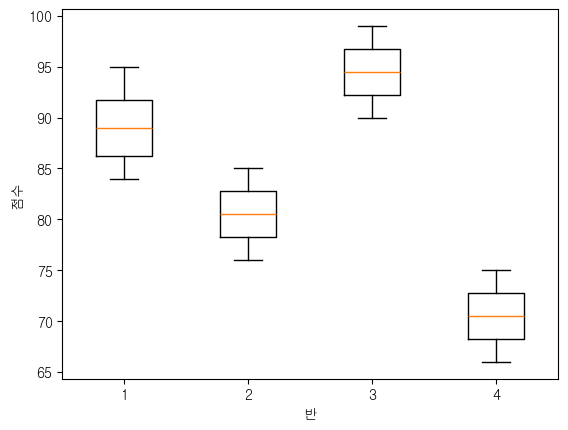

In [160]:
# 반별 시험 성적 데이터 (2차원 배열)
class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

plt.boxplot(class_scores)


plt.xlabel('반')
plt.ylabel('점수')
plt.show()

##### boxplot() 을 통해서 이상치를 확인할 수 있다.

In [184]:
data = class_scores[0]
data

[85, 88, 90, 92, 93, 87, 95, 91, 84, 86]

AttributeError: 'list' object has no attribute 'min'

In [163]:
print('최소값:', np.min(data))
print('사분위수(Q1):', np.percentile(data, 25))
print('사분위수(Q2):', np.percentile(data, 50), np.median(data))
print('사분위수(Q3):', np.percentile(data, 75))
print('최대값:', np.max(data))

최소값: 84
사분위수(Q1): 86.25
사분위수(Q2): 89.0 89.0
사분위수(Q3): 91.75
최대값: 95


In [185]:
data = pd.DataFrame(data, columns=['score'])

In [186]:
data

,score
0,85
1,88
2,90
3,92
4,93
5,87
6,95
7,91
8,84
9,86


In [178]:
data.describe(include='all')

,0
count,10.000000
mean,89.100000
std,3.665151
min,84.000000
25%,86.250000
50%,89.000000
75%,91.750000
max,95.000000


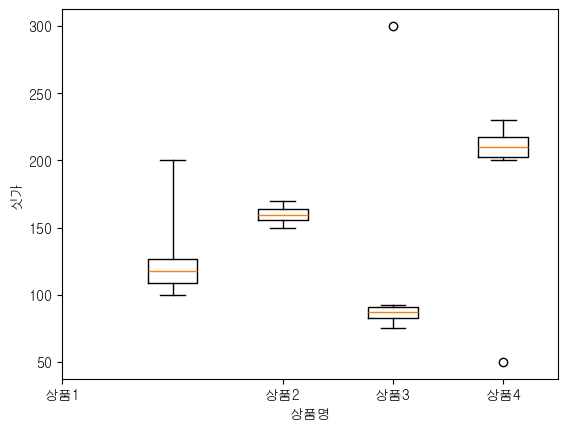

In [ ]:
weird_data = [
    [100, 120, 130, 110, 115, 105, 125, 200],   # 이상치 200   
    [150, 160, 170, 155, 165, 158],
    [80, 85, 90, 75, 92, 87, 300],   # 이상치 300
    [200, 220, 210, 205, 215, 230, 50]  # 이상치 50    
]

# whis 기본값 : 1.5
# [참고] 수염의 길이 계산 공식 : [Q1 - whis * IQR, Q3 + whis * IQR]
# [참고] IQR = Q3 - Q1
# [whis 공식 자세한 설명] https://en.wikipedia.org/wiki/Box_plot#Whiskers

plt.boxplot(weird_data, whis=5)
plt.xticks([0, 2, 3, 4], ['상품1', '상품2', '상품3', '상품4'])
plt.xlabel('상품명')
plt.ylabel('싯가')
plt.show()
